In [2]:
!pip3 install seaborn

import pandas as pd
import numpy as np
from numpy import asarray
import PIL
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

width = 100
height = 100           
     
label_names = ["No Finding","Enlarged Cardiomediastinum","Cardiomegaly",
               "Lung Opacity","Lung Lesion","Edema","Consolidation","Pneumonia",
               "Atelectasis","Pneumothorax","Pleural Effusion","Pleural Other",
               "Fracture","Support Devices"]

id_header = 'Id,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices'

ROOT_PATH = '/central/groups/CS156b/teams/clnsh/compressed_data/'

print('uploading data...')

train_label = pd.read_table(ROOT_PATH + 'train_labels', delimiter=" ", 
              names=label_names)

print('train labels loaded: ', len(train_label))

y_train = []
for index, row in train_label.iterrows():
    temp2 = [row['No Finding'], row['Enlarged Cardiomediastinum'], row['Cardiomegaly'],
            row['Lung Opacity'], row['Lung Lesion'], row['Edema'], row['Consolidation'],
            row['Pneumonia'], row['Atelectasis'], row['Pneumothorax'], row['Pleural Effusion'], 
            row['Pleural Other'], row['Fracture'], row['Support Devices']]
    i = 0 
    for val in temp2: 
        if val != val: # Handles NaN's
            temp2[i] = 0.0
        i += 1
    y_train.append(temp2)

print('y_train loaded: ', len(y_train), '\n\n')

y_train = np.array(y_train)

uploading data...
train labels loaded:  178157
y_train loaded:  178157 




In [26]:
print(y_train[0:5])
print(train_label[0:1])

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  1.]
 [-1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [-1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [-1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [-1.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.]]
   No Finding  Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  \
0         1.0                         0.0           0.0           0.0   

   Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  Pneumothorax  \
0          0.0    0.0            0.0        0.0          0.0          -1.0   

   Pleural Effusion  Pleural Other  Fracture  Support Devices  
0               0.0            0.0       0.0              1.0  


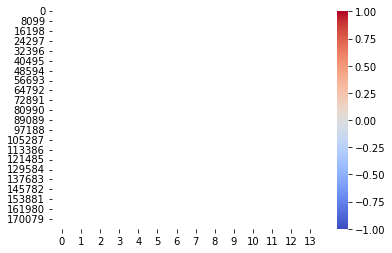

In [17]:
ax = sns.heatmap(y_train, linewidth = 0.5 , cmap = 'coolwarm' )